In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
algerian=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',skiprows=(0,124,125,126))

In [7]:
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
algerian.loc[:121,'Region']='Bejaia'

In [9]:
algerian.loc[122:,'Region']='Sidi-Bel Abbes'

In [10]:
algerian.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object

In [11]:
algerian.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [12]:
algerian.columns=[i.strip() for i in algerian.columns]
algerian['Classes'].fillna(algerian['Classes'].mode()[0],inplace=True)

In [13]:
algerian.drop(['day','month','year'],inplace=True,axis=1)

In [14]:
numerical=[each for each in algerian.columns if algerian[each].dtype!='object']
categorical=[each for each in algerian.columns if algerian[each].dtype=='object']

In [15]:
numerical

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']

In [16]:
categorical

['DC', 'FWI', 'Classes', 'Region']

In [17]:
algerian['Classes']=algerian['Classes'].str.strip()

### 1.2 Univariate Analysis on numerical data

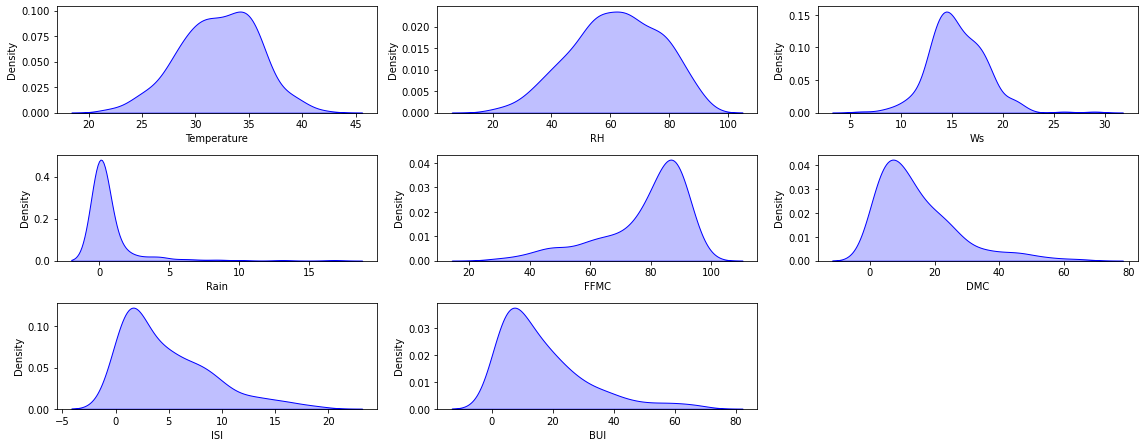

In [18]:
plt.figure(figsize=(16,10))
for i in range(len(numerical)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(algerian[numerical[i]],shade=True,color='b')
    plt.xlabel(numerical[i])
    plt.tight_layout()
    

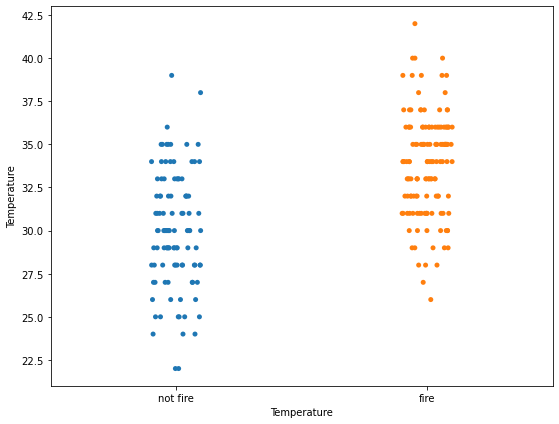

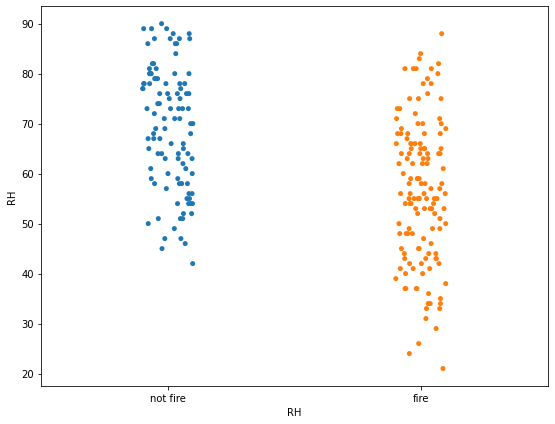

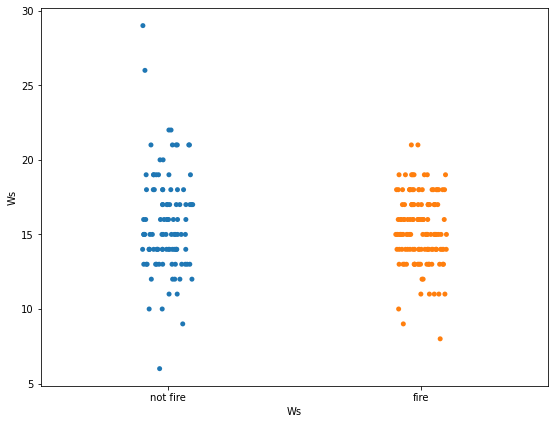

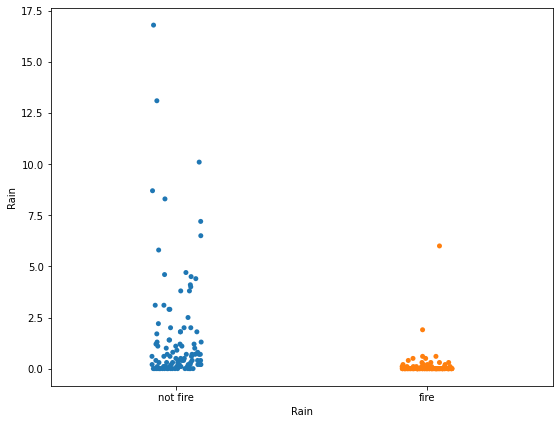

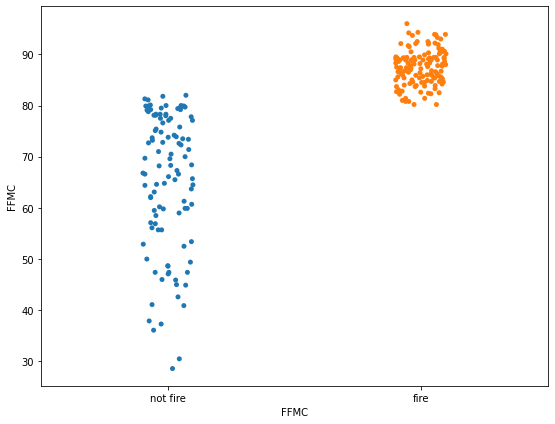

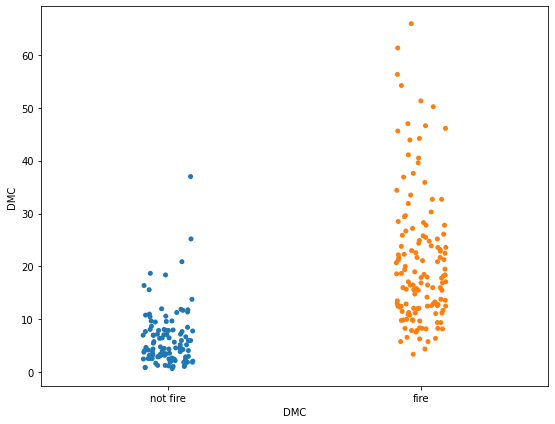

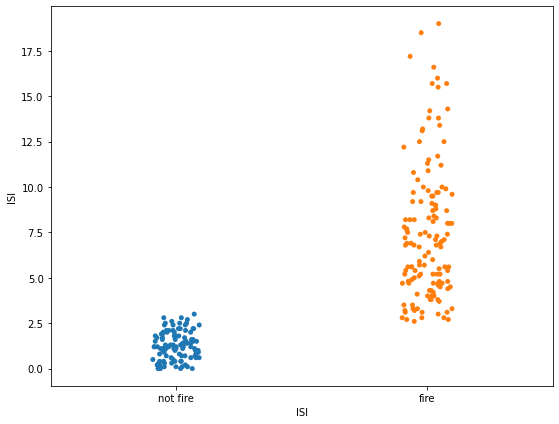

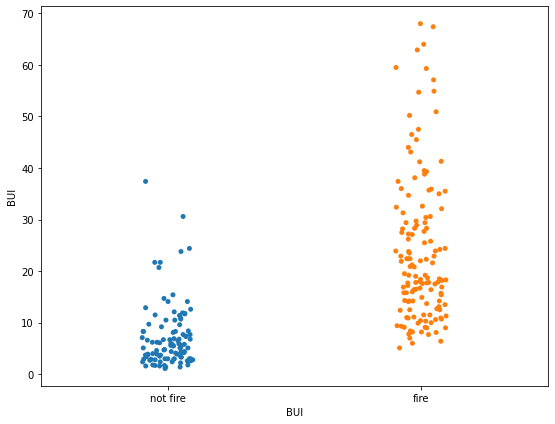

In [19]:
for i in range(len(numerical)):
    plt.figure(figsize=(15,6))
    plt.subplot(122)
    sns.stripplot(y=algerian[numerical[i]],x=algerian['Classes'])
    plt.xlabel(numerical[i])
    plt.tight_layout()
    

In [20]:
algerian.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [21]:
data_pie=algerian.groupby(['Region','Classes']).agg({'Classes':['count']})
data_pie

Classes
                          count
Region         Classes         
Bejaia         fire          59
               not fire      63
Sidi-Bel Abbes fire          79
               not fire      43

<AxesSubplot:ylabel='count'>

<Figure size 504x432 with 0 Axes>

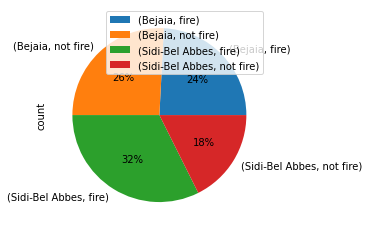

In [22]:
plt.figure(figsize=(7,6))
data_pie.plot(kind='pie', y='Classes', autopct='%1.0f%%')

In [23]:
algerian['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

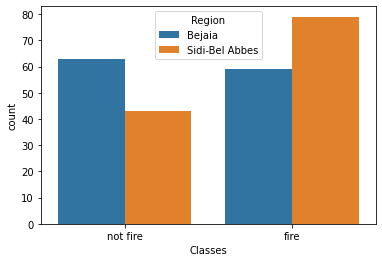

In [24]:
sns.countplot(algerian['Classes'],hue=algerian['Region'])

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
algerian['DC']=label_encoder.fit_transform(algerian['DC'])
algerian['FWI']=label_encoder.fit_transform(algerian['FWI'])
algerian['Classes']=label_encoder.fit_transform(algerian['Classes'])
algerian['Region']=label_encoder.fit_transform(algerian['Region'])

In [26]:
algerian

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1,0
1,29,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1,0
2,26,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1,0
3,25,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1,0
4,27,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,112,4.5,16.9,106,0,1
240,28,87,15,4.4,41.1,6.5,164,0.1,6.2,0,1,1
241,27,87,29,0.5,45.9,3.5,153,0.4,3.4,2,1,1
242,24,54,18,0.1,79.7,4.3,25,1.7,5.1,7,1,1


In [27]:
algerian[algerian.Classes==2]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [28]:
X=algerian.loc[:,[i for i in algerian.columns if i!='Classes']]

In [29]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,150,1.3,3.4,5,0
1,29,61,13,1.3,64.4,4.1,150,1.0,3.9,4,0
2,26,82,22,13.1,47.1,2.5,146,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,136,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,18,1.2,3.9,5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,112,4.5,16.9,106,1
240,28,87,15,4.4,41.1,6.5,164,0.1,6.2,0,1
241,27,87,29,0.5,45.9,3.5,153,0.4,3.4,2,1
242,24,54,18,0.1,79.7,4.3,25,1.7,5.1,7,1


In [30]:
Y=algerian['Classes']

In [31]:
Y.value_counts()

0    138
1    106
Name: Classes, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [33]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
114,32,54,11,0.5,73.7,7.9,82,1.2,9.6,7,0
65,34,65,13,0.0,86.8,11.1,80,5.2,11.5,103,0
132,31,42,21,0.0,90.6,18.2,83,13.4,18.0,49,1
207,34,40,18,0.0,92.1,56.3,30,14.3,59.5,90,1
162,34,56,15,2.9,74.8,7.1,185,1.6,6.8,8,1
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,147,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,148,0.4,3.0,1,0
92,25,76,17,7.2,46.0,1.3,149,0.2,1.8,1,0
179,33,57,16,0.0,87.5,15.7,98,6.7,15.7,119,1


In [34]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,64,15,0.0,86.7,14.2,141,5.7,18.3,117,0
6,33,54,13,0.0,88.2,9.9,83,6.4,10.9,111,0
153,33,48,16,0.0,87.6,7.9,43,6.8,7.8,105,1
211,35,53,17,0.5,80.2,20.7,24,2.7,30.6,101,1
198,40,41,10,0.1,92.0,22.6,142,9.5,24.2,40,1
...,...,...,...,...,...,...,...,...,...,...,...
180,34,59,16,0.0,88.1,19.5,117,7.4,19.5,22,1
5,31,67,14,0.0,82.6,5.8,59,3.1,7.0,64,0
56,36,48,13,0.0,90.3,22.2,7,8.7,29.4,43,0
125,30,64,14,0.0,79.4,5.2,26,2.2,5.6,10,1


In [35]:
Y_train

114    1
65     0
132    0
207    0
162    1
      ..
106    1
14     1
92     1
179    0
102    1
Name: Classes, Length: 163, dtype: int64

In [36]:
Y_test

24     0
6      0
153    0
211    0
198    0
      ..
180    0
5      0
56     0
125    1
148    0
Name: Classes, Length: 81, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [40]:
X_train

array([[ 0.00487747, -0.60257784, -1.68484146, ..., -0.47763563,
        -0.95113427, -0.99388373],
       [ 0.53489642,  0.14460201, -0.93856657, ..., -0.3471914 ,
         1.42829803, -0.99388373],
       [-0.260132  , -1.41768313,  2.04653297, ...,  0.09906517,
         0.08986736,  1.0061539 ],
       ...,
       [-1.85018883,  0.89178186,  0.5539832 , ..., -1.01314351,
        -1.09984879, -0.99388373],
       [ 0.26988695, -0.39880152,  0.18084575, ..., -0.058841  ,
         1.82487008,  1.0061539 ],
       [-0.52514147,  0.9597073 ,  2.04653297, ..., -0.9719506 ,
        -1.05027728, -0.99388373]])

In [41]:
X_test

array([[-2.60131998e-01,  7.66765714e-02, -1.92291688e-01,
        -3.94361879e-01,  6.76854493e-01, -3.05224430e-02,
         6.47966403e-01,  2.81509163e-01,  1.19661624e-01,
         1.77529858e+00, -9.93883735e-01],
       [ 2.69886948e-01, -6.02577838e-01, -9.38566574e-01,
        -3.94361879e-01,  7.79312965e-01, -3.70096733e-01,
        -3.40556168e-01,  4.49765818e-01, -3.88384315e-01,
         1.62658406e+00, -9.93883735e-01],
       [ 2.69886948e-01, -1.01013048e+00,  1.80845755e-01,
        -3.94361879e-01,  7.38329576e-01, -5.28038264e-01,
        -1.02229587e+00,  5.45912478e-01, -6.01214370e-01,
         1.47786954e+00,  1.00615390e+00],
       [ 7.99905893e-01, -6.70503279e-01,  5.53983197e-01,
        -1.70542289e-01,  2.32867782e-01,  4.82787531e-01,
        -1.34612223e+00, -4.39590788e-01,  9.64116361e-01,
         1.37872653e+00,  1.00615390e+00],
       [ 2.12495326e+00, -1.48560857e+00, -2.05797890e+00,
        -3.49597961e-01,  1.03887443e+00,  6.32831985e-01,
  

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logistic=LogisticRegression()

In [44]:
logistic.fit(X_train,Y_train)

LogisticRegression()

In [45]:
logistic.coef_

array([[-0.08284811, -0.19176924,  0.2200833 ,  0.39197361, -2.13807117,
         0.11899202, -0.10899583, -2.62771076, -0.50704265, -0.90625567,
        -0.0869035 ]])

In [46]:
logistic.intercept_

array([0.19676126])

In [47]:
log_pred=logistic.predict(X_test)

In [48]:
log_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [49]:
Y_test.value_counts()

0    53
1    28
Name: Classes, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [51]:
confusion_mat=confusion_matrix(Y_test,log_pred)

In [52]:
confusion_mat

array([[51,  2],
       [ 1, 27]])

In [53]:
true_negative=confusion_mat[0][0]
false_positive=confusion_mat[0][1]
false_negative=confusion_mat[1][0]
true_positive=confusion_mat[1][1]


In [54]:
true_positive,false_positive,false_negative,true_negative

(27, 2, 1, 51)

In [55]:
accuracy=round(accuracy_score(Y_test, log_pred),4)
accuracy

0.963

In [56]:
precision=true_positive/(true_positive+false_positive)


In [57]:
precision

0.9310344827586207

In [58]:
recall=true_positive/(true_positive+false_negative)

In [59]:
recall

0.9642857142857143

In [60]:
f1beta=2*(precision*recall)/(precision+recall)

In [61]:
f1beta

0.9473684210526316

#### Creating Imbalance dataset 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train_imb,X_test_imb,Y_train_imb,Y_test_imb=train_test_split(X,Y,test_size=0.40,random_state=42)

In [64]:
X_train_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
194,39,21,17,0.4,93.0,18.4,107,15.5,18.4,56,1
76,36,61,18,0.3,80.2,11.7,190,2.8,17.6,93,0
41,31,75,13,0.1,75.1,7.9,75,1.5,9.2,9,0
108,31,52,14,0.0,87.7,6.4,65,6.2,7.7,101,0
223,29,74,15,1.1,59.5,4.7,165,0.8,4.6,3,1
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,147,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,148,0.4,3.0,1,0
92,25,76,17,7.2,46.0,1.3,149,0.2,1.8,1,0
179,33,57,16,0.0,87.5,15.7,98,6.7,15.7,119,1


In [65]:
Y_train_imb

194    0
76     0
41     1
108    0
223    1
      ..
106    1
14     1
92     1
179    0
102    1
Name: Classes, Length: 146, dtype: int64

In [66]:
X_test_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,64,15,0.0,86.7,14.2,141,5.7,18.3,117,0
6,33,54,13,0.0,88.2,9.9,83,6.4,10.9,111,0
153,33,48,16,0.0,87.6,7.9,43,6.8,7.8,105,1
211,35,53,17,0.5,80.2,20.7,24,2.7,30.6,101,1
198,40,41,10,0.1,92.0,22.6,142,9.5,24.2,40,1
...,...,...,...,...,...,...,...,...,...,...,...
93,22,86,15,10.1,30.5,0.7,145,0.0,1.1,0,0
164,39,45,13,0.6,85.2,11.3,2,4.2,10.9,94,1
51,28,79,18,0.1,73.4,16.4,163,1.8,21.7,67,0
95,29,73,17,0.1,68.4,1.9,27,1.4,2.9,5,0


In [67]:
Y_test_imb

24     0
6      0
153    0
211    0
198    0
      ..
93     1
164    0
51     1
95     1
140    1
Name: Classes, Length: 98, dtype: int64

In [68]:
Y_train_imb=Y_train_imb.replace(0,1)

In [69]:
Y_train_imb

194    1
76     1
41     1
108    1
223    1
      ..
106    1
14     1
92     1
179    1
102    1
Name: Classes, Length: 146, dtype: int64

In [70]:
Y_test_imb=Y_test_imb.replace(1,0)

In [71]:
Y_test_imb

24     0
6      0
153    0
211    0
198    0
      ..
93     0
164    0
51     0
95     0
140    0
Name: Classes, Length: 98, dtype: int64

In [72]:
train_imb=pd.concat([X_train_imb,Y_train_imb],axis=1)

In [73]:
train_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
194,39,21,17,0.4,93.0,18.4,107,15.5,18.4,56,1,1
76,36,61,18,0.3,80.2,11.7,190,2.8,17.6,93,0,1
41,31,75,13,0.1,75.1,7.9,75,1.5,9.2,9,0,1
108,31,52,14,0.0,87.7,6.4,65,6.2,7.7,101,0,1
223,29,74,15,1.1,59.5,4.7,165,0.8,4.6,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,147,0.2,1.4,0,0,1
14,28,80,17,3.1,49.4,3.0,148,0.4,3.0,1,0,1
92,25,76,17,7.2,46.0,1.3,149,0.2,1.8,1,0,1
179,33,57,16,0.0,87.5,15.7,98,6.7,15.7,119,1,1


In [74]:
test_imb=pd.concat([X_test_imb,Y_test_imb],axis=1)

In [75]:
test_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
24,31,64,15,0.0,86.7,14.2,141,5.7,18.3,117,0,0
6,33,54,13,0.0,88.2,9.9,83,6.4,10.9,111,0,0
153,33,48,16,0.0,87.6,7.9,43,6.8,7.8,105,1,0
211,35,53,17,0.5,80.2,20.7,24,2.7,30.6,101,1,0
198,40,41,10,0.1,92.0,22.6,142,9.5,24.2,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,22,86,15,10.1,30.5,0.7,145,0.0,1.1,0,0,0
164,39,45,13,0.6,85.2,11.3,2,4.2,10.9,94,1,0
51,28,79,18,0.1,73.4,16.4,163,1.8,21.7,67,0,0
95,29,73,17,0.1,68.4,1.9,27,1.4,2.9,5,0,0


In [76]:
data_imb=pd.concat([train_imb,test_imb],axis=0,ignore_index=True)

In [77]:
data_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,39,21,17,0.4,93.0,18.4,107,15.5,18.4,56,1,1
1,36,61,18,0.3,80.2,11.7,190,2.8,17.6,93,0,1
2,31,75,13,0.1,75.1,7.9,75,1.5,9.2,9,0,1
3,31,52,14,0.0,87.7,6.4,65,6.2,7.7,101,0,1
4,29,74,15,1.1,59.5,4.7,165,0.8,4.6,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,22,86,15,10.1,30.5,0.7,145,0.0,1.1,0,0,0
240,39,45,13,0.6,85.2,11.3,2,4.2,10.9,94,1,0
241,28,79,18,0.1,73.4,16.4,163,1.8,21.7,67,0,0
242,29,73,17,0.1,68.4,1.9,27,1.4,2.9,5,0,0


In [78]:
data_imb.groupby(['Classes'])['Classes'].count()

Classes
0     98
1    146
Name: Classes, dtype: int64

In [79]:
X_w_imb=data_imb.loc[:,[i for i in data_imb.columns if i!='Classes']]
Y_w_imb=data_imb.loc[:,'Classes']

In [80]:
Y_w_imb

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

#### Imbalanced data set where it has 219 1's and 25 0's

In [81]:
X_train_w_imb,X_test_w_imb,Y_train_w_imb,Y_test_w_imb=train_test_split(X_w_imb,Y_w_imb,test_size=0.30,random_state=42)

In [82]:
X_train_w_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
234,32,63,14,0.0,87.0,10.9,96,5.6,12.5,108,0
227,32,54,11,0.5,73.7,7.9,82,1.2,9.6,7,0
180,31,55,16,0.1,79.9,4.5,32,2.5,5.3,13,0
5,36,54,18,0.0,89.4,20.0,8,9.7,27.5,47,0
56,29,87,18,0.0,80.0,11.8,78,2.8,11.8,81,1
...,...,...,...,...,...,...,...,...,...,...,...
106,28,87,15,4.4,41.1,6.5,164,0.1,6.2,0,1
14,37,52,18,0.0,89.3,16.0,4,9.7,22.9,39,0
92,34,45,17,0.0,90.5,18.0,64,10.9,17.7,37,1
179,35,64,17,0.0,87.2,31.9,22,6.8,41.2,45,0


In [83]:
X_test_w_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,71,17,0.3,69.6,3.2,81,1.5,5.1,6,0
6,33,59,16,0.8,74.2,7.0,166,1.6,6.7,8,1
153,29,80,14,2.0,48.7,2.2,150,0.3,2.6,1,1
211,25,86,21,4.6,40.9,1.3,149,0.1,1.8,0,0
198,31,83,17,0.0,84.5,19.4,88,4.7,19.2,112,1
...,...,...,...,...,...,...,...,...,...,...,...
165,32,55,14,0.0,86.2,8.3,46,5.0,8.2,95,1
154,28,79,12,0.0,73.2,9.5,114,1.3,12.6,9,0
216,34,56,17,0.1,84.7,9.7,74,4.7,10.3,96,1
79,36,50,16,0.0,89.9,32.7,154,9.5,32.6,52,1


In [84]:
Y_train_w_imb

234    0
227    0
180    0
5      1
56     1
      ..
106    1
14     1
92     1
179    0
102    1
Name: Classes, Length: 170, dtype: int64

In [85]:
Y_test_w_imb

24     1
6      1
153    0
211    0
198    0
      ..
165    0
154    0
216    0
79     1
29     1
Name: Classes, Length: 74, dtype: int64

In [86]:
logistic=LogisticRegression()

In [87]:
logistic.fit(X_train_w_imb,Y_train_w_imb)

LogisticRegression()

In [88]:
log_imb_pred=logistic.predict(X_test_w_imb)

In [89]:
len(log_imb_pred)

74

In [90]:
Y_test_w_imb

24     1
6      1
153    0
211    0
198    0
      ..
165    0
154    0
216    0
79     1
29     1
Name: Classes, Length: 74, dtype: int64

In [91]:
log_imb_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [92]:
confusion_mat=confusion_matrix(Y_test_w_imb,log_imb_pred)

In [93]:
confusion_mat

array([[ 6, 26],
       [ 3, 39]])

In [94]:
true_negative=confusion_mat[0][0]
false_positive=confusion_mat[0][1]
false_negative=confusion_mat[1][0]
true_positive=confusion_mat[1][1]


In [95]:
print("true_negative: {} , false_positive: {} ,false_negative: {} , true_positive : {}".format(true_negative,false_positive,false_negative,true_positive))
      

true_negative: 6 , false_positive: 26 ,false_negative: 3 , true_positive : 39


In [96]:
precision=true_positive/(true_positive+false_positive)


In [97]:
precision

0.6

In [98]:
accuracy=round(accuracy_score(Y_test_w_imb, log_imb_pred),4)
accuracy

0.6081

In [99]:
recall=true_positive/(true_positive+false_negative)
recall

0.9285714285714286

In [100]:
f1_beta= 2* (precision*recall)/(precision+recall)

In [101]:
f1_beta

0.7289719626168225

### Handling Imbalanced data set

In [102]:
! pip install scikit-learn==1.1.0

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [169]:
from imblearn.over_sampling import SMOTE

In [242]:
sm = SMOTE(random_state = 8)

In [243]:
X_w_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,39,21,17,0.4,93.0,18.4,107,15.5,18.4,56,1
1,36,61,18,0.3,80.2,11.7,190,2.8,17.6,93,0
2,31,75,13,0.1,75.1,7.9,75,1.5,9.2,9,0
3,31,52,14,0.0,87.7,6.4,65,6.2,7.7,101,0
4,29,74,15,1.1,59.5,4.7,165,0.8,4.6,3,1
...,...,...,...,...,...,...,...,...,...,...,...
239,22,86,15,10.1,30.5,0.7,145,0.0,1.1,0,0
240,39,45,13,0.6,85.2,11.3,2,4.2,10.9,94,1
241,28,79,18,0.1,73.4,16.4,163,1.8,21.7,67,0
242,29,73,17,0.1,68.4,1.9,27,1.4,2.9,5,0


In [244]:
Y_w_imb

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

In [245]:
X_wi_imb,Y_wi_imb=sm.fit_resample(X_w_imb, Y_w_imb.ravel())

In [246]:
X_w_imb.shape

(244, 11)

In [247]:
X_wi_imb.shape

(292, 11)

In [248]:
Y_wi_imb.shape

(292,)

In [249]:
Y_w_imb.shape

(244,)

In [250]:
sum(Y_wi_imb==1)

146

In [251]:
sum(Y_w_imb==1)

146

In [252]:
sum(Y_wi_imb==0)

146

In [253]:
sum(Y_w_imb==0)

98

In [254]:
X_wi_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,39,21,17,0.4,93.000000,18.400000,107,15.500000,18.400000,56,1
1,36,61,18,0.3,80.200000,11.700000,190,2.800000,17.600000,93,0
2,31,75,13,0.1,75.100000,7.900000,75,1.500000,9.200000,9,0
3,31,52,14,0.0,87.700000,6.400000,65,6.200000,7.700000,101,0
4,29,74,15,1.1,59.500000,4.700000,165,0.800000,4.600000,3,1
...,...,...,...,...,...,...,...,...,...,...,...
287,32,67,16,0.0,86.667295,15.369881,121,5.760237,17.330119,116,0
288,35,57,16,0.0,88.523764,21.777733,125,7.823764,21.777733,27,1
289,35,35,15,0.0,93.041919,28.531239,188,14.682010,32.005939,73,1
290,34,63,15,0.0,89.039538,35.671993,35,9.195353,45.430120,64,0


In [255]:
Y_wi_imb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [256]:
X_train_wi_imb,X_test_wi_imb,Y_train_wi_imb,Y_test_wi_imb=train_test_split(X_wi_imb,Y_wi_imb,test_size=0.33,random_state=42)


In [257]:
X_train_wi_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
272,36,41,17,0.169806,88.462187,12.884903,26,11.428112,10.747231,123,1
38,32,76,20,0.700000,63.100000,2.600000,183,1.300000,3.000000,5,0
179,35,64,17,0.000000,87.200000,31.900000,22,6.800000,41.200000,45,0
170,38,35,15,0.000000,93.800000,23.000000,109,15.700000,22.900000,70,1
57,36,58,19,0.000000,88.600000,29.600000,21,9.200000,38.800000,55,0
...,...,...,...,...,...,...,...,...,...,...,...
188,31,50,19,0.600000,77.800000,10.600000,106,2.400000,12.900000,67,0
71,26,49,6,2.000000,61.300000,11.900000,77,0.600000,11.900000,4,1
106,28,87,15,4.400000,41.100000,6.500000,164,0.100000,6.200000,0,1
270,34,51,15,0.000000,88.886472,20.736923,193,8.244244,26.659045,35,0


In [258]:
Y_train_wi_imb

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [259]:
X_test_wi_imb

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
84,30,80,15,0.000000,83.100000,7.900000,91,3.500000,10.000000,84,1
260,31,60,10,6.876765,65.737813,4.362187,166,0.939636,4.201822,4,1
45,31,62,15,0.000000,83.300000,5.800000,42,3.800000,6.400000,81,1
176,31,55,11,0.000000,87.800000,16.500000,134,5.400000,19.200000,116,0
143,25,76,17,7.200000,46.000000,1.300000,149,0.200000,1.800000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
97,30,73,14,0.000000,79.200000,6.500000,35,2.100000,6.600000,11,1
108,33,68,15,0.000000,86.100000,23.900000,123,5.200000,23.900000,120,1
228,34,65,13,0.000000,86.800000,11.100000,80,5.200000,11.500000,103,0
55,37,55,15,0.000000,89.300000,28.300000,144,8.300000,28.300000,38,1


In [260]:
Y_test_wi_imb

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0])

In [261]:
logistic_wi_imb=LogisticRegression()

In [262]:
logistic_wi_imb.fit(X_train_wi_imb,Y_train_wi_imb)

LogisticRegression()

In [263]:
logistic_wi_imb.intercept_

array([-0.00124142])

In [264]:
logistic_wi_imb.coef_

array([[ 0.01080128, -0.00745915,  0.01880514,  0.00835093, -0.00144218,
         0.08519839,  0.00042901, -0.08724471, -0.06116622, -0.00245365,
         0.2227165 ]])

In [265]:
log_wi_imb_pred=logistic_wi_imb.predict(X_test_wi_imb)

In [266]:
log_wi_imb_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1])

In [267]:
Y_test_wi_imb

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0])

In [268]:
confusion_mat=confusion_matrix(Y_test_wi_imb,log_wi_imb_pred)

In [269]:
confusion_mat

array([[30, 13],
       [31, 23]])

In [270]:
true_negative=confusion_mat[0][0]
false_positive=confusion_mat[0][1]
false_negative=confusion_mat[1][0]
true_positive=confusion_mat[1][1]


In [271]:
print("true_negative: {} , false_positive: {} ,false_negative: {} , true_positive : {}".format(true_negative,false_positive,false_negative,true_positive))
      

true_negative: 30 , false_positive: 13 ,false_negative: 31 , true_positive : 23


In [272]:
precision=true_positive/(true_positive+false_positive)


In [273]:
precision

0.6388888888888888

In [274]:
accuracy=round(accuracy_score(Y_test_w_imb, log_imb_pred),4)
accuracy

0.6081

In [275]:
recall=true_positive/(true_positive+false_negative)
recall

0.42592592592592593